# Bilan radiatif - étude des données CERES

**Auteur : FERRY Frédéric (DESR/ENM/C3M) - septembre 2021

L’objectif de ce calepin Python est d'étudier le bilan radiatif du système Terre-Atmosphère à partir de données CERES (Clouds and the Earth’s Radiant Energy System : https://ceres.larc.nasa.gov/data/). On comparera les données à disposition avec le graphique ci-dessous dont les valeurs représentent des moyennes globales et anuelles. On étudiera plus précisément la répartition géographique de ce bilan radiatif afin de mettre en évidence les déséquilibres radiatifs à l'origine des mouvements de circulation générale.

- Etude des données de bilan radiatif en moyenne globale
- Etude du rayonnement solaire incident
- Bilan radiatif au sommet de l'atmosphère en moyenne zonale
- Répartition globale du bilan radiatif au sommet de l'atmosphère
- Variations saisonnières du bilan radiatif au sommet de l'atmosphère
- Bilan radiatif en surface en moyenne zonale
- Répartition globale du bilan radiatif en surface
- Variations saisonnières du bilan radiatif en surface
- Bilan radiatif de l'atmosphère
- Bonus : effet radiatif des nuages

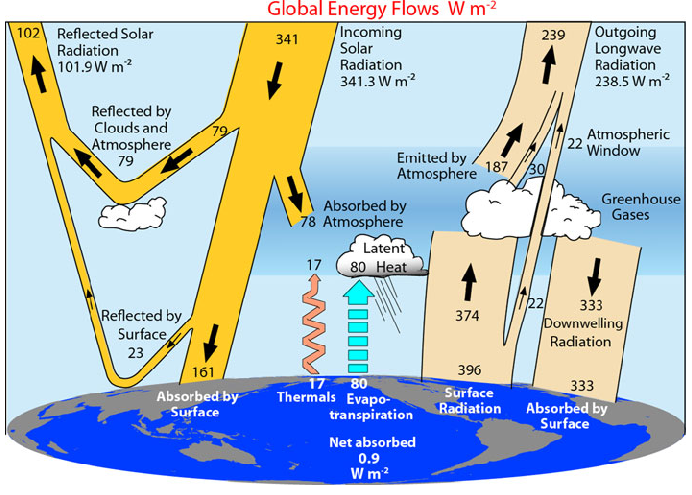

Concepts Python illustrés :
- Traitement de données météorologiques au format netcdf (xarray)
- Calcul de climatologies (méthode groupby de xarray)
- Tracé de figures (cartopy)
- Tracé de cartes globales (cartopy)

<div class="alert alert-warning">
<b>Instructions : </b>
<p><b>1) </b>Exécuter les cellules qui suivent de façon séquentielle</p>
<p><b>2) </b>Répondre aux questions (cadres de couleur jaune) dans les parties dédiées (cadres de couleur verte)</p>
<p><b>3) </b>Sauvegarder le notebook final au format pdf</p>
</div>

In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import gridspec

import numpy as np
import scipy
from scipy import integrate

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid

import IPython.display as IPdisplay, matplotlib.font_manager as fm
from PIL import Image
import glob

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dir_data='./data/'
dir_figs='./figs/'
dir_anim='./anim/'
if not os.path.exists(dir_figs):
    os.makedirs(dir_figs)
if not os.path.exists(dir_anim):
    os.makedirs(dir_anim)

# Lecture des données

Données CERES EBAF 4.1, moyennes mensuelles au format netCDF : https://asdc.larc.nasa.gov/project/CERES/CERES_EBAF_Edition4.1

La lecture des données au format netCDF est faite via le module xarray. Pour plus d'informations sur xarray et le format netCDF : https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/

In [ ]:
file="CERES_EBAF_Edition4.1_200003-202111.nc"
data    = xr.open_dataset(dir_data+file)
data

In [ ]:
print(data.time.values)
print(data.lat.values)
print(data.lon.values)

<div class="alert alert-warning">
<b>Questions : </b>
<p><b>1) </b> Quelle est la résolution temporelle des données ?</p>
<p><b>2) </b> Sur quelle période sont disponibles les données ?</p>
<p><b>3) </b> Quelle est la résolution spatiale des données (en degrés) ?</p>
</div>

<div class="alert alert-success">
<b>Réponses : </b>
</div>

In [ ]:
year1=input("année de départ : ")
year2=input("année de fin : ")

In [ ]:
data    = data.sel(time=slice(year1,year2))
print(data.time.values[0])
print(data.time.values[-1])
print(data.time.shape)

# Etude des données de bilan radiatif en moyenne globale

In [ ]:
mons=['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def plot_axes(ax):
    plt.axhline(0, linewidth=1, linestyle='--', color='k')
    plt.xlabel("Month")
    plt.ylabel("Radiation ($W/m^2$)")
    plt.legend(loc='best')
    plt.grid()
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(mons) #add monthlabels to the xaxis
    return ax

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title("Top of atmosphere radiation")
plt.plot(data['gsolar_clim'], label='Incoming solar', color='orange')
plt.plot(data['gtoa_sw_all_clim'], label='TOA shortwave', color='blue')
plt.plot(data['gtoa_lw_all_clim'], label='TOA longwave', color='green')
plt.plot(data['gtoa_net_all_clim'], label='TOA net', color='red')
plot_axes(ax)

figname=dir_figs+'TOA_global'
plt.savefig(figname+'.png',bbox_inches='tight')

plt.show()

<div class="alert alert-warning">
<b>Questions : </b>
<p><b>1) </b> Comment expliquer que le rayonnement solaire incident est plus faible en juillet qu'en janvier ?</p>
<p><b>2) </b> Vérifier (éventuellement via des calculs dans la cellule de code ci-dessous) la cohérence des valeurs avec les moyennes globales et annuelles du schéma affiché en introduction du calepin.</p>
</div>

<div class="alert alert-success">
<b>Réponses : </b>
</div>

<div class="alert alert-warning">
<b>Question : </b>
<p><b>1) </b> Calculer dans la cellule de code ci-dessous l'albedo moyen du système Terre-Atmosphère.</p>
</div>

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title("Surface shortwave radiation")
plt.plot(data['gsfc_sw_up_all_clim'], label='SFC shortwave up', color='blue')
plt.plot(data['gsfc_sw_down_all_clim'], label='SFC shortwave down', color='green')
plt.plot(data['gsfc_net_sw_all_clim'], label='SFC shortwave net', color='red')
plot_axes(ax)
figname=dir_figs+'SFC_SW_global'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title("Surface longwave radiation")
plt.plot(data['gsfc_lw_up_all_clim'], label='SFC longwave up', color='blue')
plt.plot(data['gsfc_lw_down_all_clim'], label='SFC longwave down', color='green')
plt.plot(data['gsfc_net_lw_all_clim'], label='SFC longwave net', color='red')
plot_axes(ax)
figname=dir_figs+'SFC_LW_global'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title("Surface net radiation")
plt.plot(data['gsfc_net_lw_all_clim'], label='SFC net longwave', color='blue')
plt.plot(data['gsfc_net_sw_all_clim'], label='SFC net shortwave', color='green')
plt.plot(data['gsfc_net_tot_all_clim'], label='SFC net radiation', color='red')
plot_axes(ax)
figname=dir_figs+'SFC_Net_global'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Question : </b>
<p><b>1) </b> Vérifier (éventuellement via des calculs dans la cellule de code ci-dessous) la cohérence des valeurs avec les moyennes globales et annuelles du schéma affiché en introduction du calepin.</p>
</div>

<div class="alert alert-success">
<b>Réponse : </b>
</div>

<div class="alert alert-warning">
<b>Question : </b>
<p><b>1) </b> Calculer dans la cellule de code ci-dessous l'albedo moyen en surface.</p>
</div>

# Etude du rayonnement solaire incident

In [ ]:
solar_mean_month = data['solar_mon'].groupby('time.month').mean('time')
print(solar_mean_month.shape)
solar_mean_month_z=solar_mean_month.mean(axis=2)
solar_mean_annual_z=solar_mean_month_z.mean(axis=0)
lat=solar_mean_month.lat.values

print(lat)
print(solar_mean_month_z.shape)
print(solar_mean_annual_z.shape)

In [ ]:
solar_levels=np.arange(0,550,25)

fig = plt.figure(figsize=(12,6))
fig.suptitle('Incoming solar radiation ($W/m^2$)')
spec = gridspec.GridSpec(ncols=2, nrows=1, wspace=0, 
                         width_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
plt.title('Monthly mean')
ax0.set_xlabel('Month')
ax0.set_ylabel('Latitude')
ax0.set_xticks(np.arange(0,12))
ax0.set_xticklabels(mons) #add monthlabels to the xaxis
ax0.set_yticks(np.arange(0,180,10))
ax0.set_yticklabels(lat[::10]) #add lat to the yaxis

c = ax0.contour(np.transpose(np.array(solar_mean_month_z)), levels=solar_levels, colors='grey', linewidths=0.5)
cf = ax0.contourf(np.transpose(np.array(solar_mean_month_z)), levels=solar_levels, cmap='jet', extend='both')
cb = fig.colorbar(cf, orientation='vertical', aspect=65, shrink=0.5, pad=0.02, extendrect='True')

ax1 = fig.add_subplot(spec[1])
plt.title('Annual mean')
ax1.set_yticks(lat[::10])
ax1.set_yticklabels(lat[::10]) #add lat to the yaxis
ax1.set_ylim([-89.5, 89.5])
ax1.plot(solar_mean_annual_z, lat)

figname=dir_figs+'solar'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

ilat = list(lat).index(0.5)
solar_mean_month_z0=solar_mean_month_z[:,ilat]
ilat = list(lat).index(20.5)
solar_mean_month_z20=solar_mean_month_z[:,ilat]
ilat = list(lat).index(40.5)
solar_mean_month_z40=solar_mean_month_z[:,ilat]
ilat = list(lat).index(60.5)
solar_mean_month_z60=solar_mean_month_z[:,ilat]
ilat = list(lat).index(80.5)
solar_mean_month_z80=solar_mean_month_z[:,ilat]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(211)
plt.title('Northern hemisphere')
plt.plot(solar_mean_month_z80, label='80N')
plt.plot(solar_mean_month_z60, label='60N')
plt.plot(solar_mean_month_z40, label='40N')
plt.plot(solar_mean_month_z20, label='20N')
plt.plot(solar_mean_month_z0, label='Equator')
plot_axes(ax)

ilat = list(lat).index(-0.5)
solar_mean_month_z0=solar_mean_month_z[:,ilat]
ilat = list(lat).index(-20.5)
solar_mean_month_z20=solar_mean_month_z[:,ilat]
ilat = list(lat).index(-40.5)
solar_mean_month_z40=solar_mean_month_z[:,ilat]
ilat = list(lat).index(-60.5)
solar_mean_month_z60=solar_mean_month_z[:,ilat]
ilat = list(lat).index(-80.5)
solar_mean_month_z80=solar_mean_month_z[:,ilat]

ax = fig.add_subplot(212)
plt.title('Southern hemisphere')
plt.plot(solar_mean_month_z80, label='80S')
plt.plot(solar_mean_month_z60, label='60S')
plt.plot(solar_mean_month_z40, label='40S')
plt.plot(solar_mean_month_z20, label='20S')
plt.plot(solar_mean_month_z0, label='Equator')
plot_axes(ax)

figname=dir_figs+'solar2'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Questions : </b>
<p><b>1) </b> Commenter le cycle saisonnier du rayonnement solaire incident selon la latitude considérée.</p>
<p><b>2) </b> Le maximum de rayonnement solaire incident se rencontre à l'équateur en décembre et janvier ou aux hautes latitudes en été quand les journées sont longues ?</p>
</div>

<div class="alert alert-success">
<b>Réponses : </b>
</div>

# Bilan radiatif au sommet de l'atmosphère

In [ ]:
months=['January','February','March','April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December']
seasons = ['DJF','JJA','MAM','SON']

In [ ]:
def lonflip(da):
    lon_name = 'lon'
    da['_longitude_adjusted'] = xr.where(
        da[lon_name] > 180,
        da[ lon_name] - 360,
        da[lon_name])
    da = (
        da
        .swap_dims({lon_name: '_longitude_adjusted'})
        .sel(**{'_longitude_adjusted': sorted(da._longitude_adjusted)})
        .drop(lon_name))
    da = da.rename({'_longitude_adjusted': lon_name})
    return da

In [ ]:
# Rayonnement solaire incident
solar_mean = lonflip(data['solar_mon'].mean('time')) # moyenne annuelle
solar_mean_z = solar_mean.mean(axis=1)  # moyenne annuelle et zonale
solar_mean_month = lonflip(data['solar_mon'].groupby('time.month').mean('time')) # moyenne mensuelle
solar_mean_month_z = solar_mean_month.mean(axis=2)  # moyenne mensuelle et zonale
solar_mean_season = lonflip(data['solar_mon'].groupby('time.season').mean('time')) # moyenne saisonnière
solar_mean_sz = solar_mean_season.mean(axis=2)  # moyenne saisonnière et zonale

# Rayonnement visible (solaire réfléchi)
toa_sw_mean = lonflip(data['toa_sw_all_mon'].mean('time'))  # moyenne annuelle
toa_sw_mean_z = toa_sw_mean.mean(axis=1) # moyenne annuelle et zonale
toa_sw_mean_month = lonflip(data['toa_sw_all_mon'].groupby('time.month').mean('time')) # moyenne mensuelle
toa_sw_mean_month_z = toa_sw_mean_month.mean(axis=2)  # moyenne mensuelle et zonale
toa_sw_mean_season = lonflip(data['toa_sw_all_mon'].groupby('time.season').mean('time')) # moyenne saisonnière
toa_sw_mean_sz = toa_sw_mean_season.mean(axis=2)  # moyenne saisonnière et zonale

# Rayonnement IR émis
toa_lw_mean = lonflip(data['toa_lw_all_mon'].mean('time'))  # moyenne annuelle
toa_lw_mean_z = toa_lw_mean.mean(axis=1) # moyenne annuelle et zonale
toa_lw_mean_month = lonflip(data['toa_lw_all_mon'].groupby('time.month').mean('time')) #  moyenne mensuelle
toa_lw_mean_month_z = toa_lw_mean_month.mean(axis=2) # moyenne mensuelle et zonale
toa_lw_mean_season = lonflip(data['toa_lw_all_mon'].groupby('time.season').mean('time'))  # moyenne saisonnière
toa_lw_mean_sz = toa_lw_mean_season.mean(axis=2) # moyenne saisonnière et zonale

# Royonnement net TOA
toa_net_mean = lonflip(data['toa_net_all_mon'].mean('time'))# moyenne annuelle
toa_net_mean_z = toa_net_mean.mean(axis=1) # moyenne annuelle et zonale
toa_net_mean_month = lonflip(data['toa_net_all_mon'].groupby('time.month').mean('time')) # moyenne mensuelle
toa_net_mean_month_z = toa_net_mean_month.mean(axis=2) # moyenne mensuelle et zonale
toa_net_mean_season = lonflip(data['toa_net_all_mon'].groupby('time.season').mean('time')) # moyenne saisonnière
toa_net_mean_sz = toa_net_mean_season.mean(axis=2) # moyenne saisonnière et zonale

lat=solar_mean.lat.values
lon=solar_mean.lon.values

# Bilan radiatif au sommet de l'atmosphère en moyenne zonale

In [ ]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Top Of Atmosphere Radiative Budget - zonal and annual mean', fontsize=16)
plt.title('CERES '+year1+'-'+year2, loc='center')

plt.xlabel('Latitude')
plt.ylabel('Radiation ($W/m^2$)')
plt.xticks(np.arange(-90, 120, 30), ('90S', '60S', '30S', 'Eq', '30N', '60N', '90N'))
plt.plot(lat, solar_mean_z, label='Incoming Solar Radiation', color='red', linewidth=2)
plt.plot(lat, toa_sw_mean_z, label='Reflected Solar Radiation', color='purple', linewidth=2)
plt.plot(lat, solar_mean_z-toa_sw_mean_z, label='Absorbed SW Radiation', color='orange', linewidth=2)
plt.plot(lat, toa_lw_mean_z, label='Emitted LW Radiation', color='blue', linewidth=2)
plt.plot(lat, toa_net_mean_z, label='Net Radiation', color='black', linewidth=2)
plt.axvline(0, color='grey', linestyle="-", linewidth=0.5)
plt.axhline(0, color='grey', linestyle="-", linewidth=0.5)
plt.fill_between(lat, toa_net_mean_z, where=toa_net_mean_z > 0, color='lightcoral')
plt.fill_between(lat, toa_net_mean_z, where=toa_net_mean_z < 0, color='lightcyan')
plt.legend(loc='lower center', ncol=3)

figname=dir_figs+'TOA_rad_budget_zonal_annual'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Questions : </b>
<p><b>1) </b> Localiser les régions du globe où le bilan radiatif au sommet de l'atmosphère ets excédentaire/déficitaire.</p>
<p><b>2) </b> Comment peut s'expliquer le déséquilibre radiatif méridien observé ?</p>
<p><b>3) </b> En moyenne annuelle, le deficit radiatif semble être plus important que l'exédent radiatif, ce qui voudrait dire que la Terre se refroidit. Est-ce ce qui est réellement observé ? Pourquoi ?</p>
</div>

<div class="alert alert-success">
<b>Réponses : </b>
</div>

In [ ]:
re=6371000
mult=2*np.pi*re*np.cos(lat*np.pi/180)

fig = plt.figure(figsize=(12,8))
fig.suptitle('Top Of Atmosphere net Radiation - zonal and annual mean', fontsize=16)
plt.title('CERES '+year1+'-'+year2, loc='center')

plt.xlabel('Latitude')
plt.ylabel('$E_\phi (GW/m)$')
plt.xticks(np.arange(-90, 120, 30), ('90S', '60S', '30S', 'Eq', '30N', '60N', '90N'))
plt.plot(lat, toa_net_mean_z*mult*1e-9, label='Net', color='black', linewidth=2)
plt.fill_between(lat, toa_net_mean_z*mult*1e-9, where=toa_net_mean_z*mult*1e-9 > 0, color='lightcoral')
plt.fill_between(lat, toa_net_mean_z*mult*1e-9, where=toa_net_mean_z*mult*1e-9 < 0, color='lightcyan')
plt.axvline(0, color='black', linestyle="-", linewidth=0.5)
plt.axhline(0, color='black', linestyle="-", linewidth=0.5)

figname=dir_figs+'TOA_net_area'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

# Répartition géographique du bilan radiatif au sommet de l'atmosphère

In [ ]:
proj=ccrs.EqualEarth()

def plot_background(ax):
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
    return ax

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Top Of Atmosphere Radiative Budget - annual mean - CERES '+year1+'-'+year2, fontsize=14)

ax = fig.add_subplot(2, 2, 1, projection=proj)
levels = np.arange(150,420,20)
plot_background(ax)
ax.set_title('Incoming Solar Radiation', fontsize=12)
cf = ax.contourf(lon, lat, solar_mean, levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c = ax.contour(lon, lat, solar_mean, levels=levels, colors='black', linewidths=0.2, transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

ax = fig.add_subplot(2, 2, 2, projection=proj)
#levels = np.arange(int(np.min(solar_mean-toa_sw_mean)),int(np.max(solar_mean-toa_sw_mean)),10)
levels = np.arange(50,360,10)
plot_background(ax)
ax.set_title('Absorbed SW Radiation', fontsize=12)
cf = ax.contourf(lon, lat, solar_mean-toa_sw_mean, levels=levels, transform=ccrs.PlateCarree(),
                 cmap='jet', extend='both')
c = ax.contour(lon, lat, solar_mean-toa_sw_mean, levels=levels, colors='black', linewidths=0.2,
               transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

ax = fig.add_subplot(2, 2, 3, projection=proj)
#levels = np.arange(int(np.min(toa_lw_mean)),int(np.max(toa_lw_mean)),10)
levels = np.arange(120,310,10)
plot_background(ax)
ax.set_title('Emitted LW Radiation', fontsize=12)
cf = ax.contourf(lon, lat, toa_lw_mean, levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c = ax.contour(lon, lat, toa_lw_mean, levels=levels, colors='black', linewidths=0.2, transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

ax = fig.add_subplot(2, 2, 4, projection=proj)
#levels = np.arange(int(np.min(toa_net_mean)),int(np.max(toa_net_mean)),10)
levels = np.arange(-120,130,10)
plot_background(ax)
ax.set_title('TOA Net Radiation', fontsize=12)
cf = ax.contourf(lon, lat, toa_net_mean, levels=levels, transform=ccrs.PlateCarree(),
                 cmap='coolwarm', extend='both')
c = ax.contour(lon, lat, toa_net_mean, levels=levels, colors='black', linewidths=0.2, transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

figname=dir_figs+'TOA_rad_budget_global_annual'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Questions : </b>
<p><b>1) </b> Quelles sont les régions qui absorbent le plus de rayonnement ? Pourquoi ?</p>
<p><b>2) </b> Comment expliquer l'absorption plus faible sur les continents tropicaux, les déserts subtropicaux, les régions polaires, et le bord est des océans subtropicaux ?</p>
<p><b>3) </b> En zone tropicale, comment peuvent s'expliquer les émissions plus faibles sur l'Amazonie, l'Afrique australe et l'Indonésie ?</p>
<p><b>4) </b> En zone tropicale, quelle est la principale région en déficit radiatif ?</p>
<p><b>5) </b> En conclusion, le bilan radiatif net au sommet de l'atmosphère est-il à symétrie zonale ?</p>
</div>

<div class="alert alert-success">
<b>Réponses : </b>
</div>

# Variations saisonnières du bilan radiatif au sommet de l'atmosphère

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Top Of Atmosphere Radiative Budget - CERES '+year1+'-'+year2+' - zonal and seasonnal mean', fontsize=14)

for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    #plt.xlabel('Latitude')
    plt.ylabel('Radiation ($W/m^2$)')
    plt.xticks(np.arange(-90, 120, 30), ('90S', '60S', '30S', 'Eq', '30N', '60N', '90N'))
    plt.title(seasons[i-1], loc='center')
    plt.plot(lat, solar_mean_sz[i-1,:], label='Incoming Solar Radiation', color='red', linewidth=2)
    plt.plot(lat, toa_sw_mean_sz[i-1,:], label='Reflected Solar Radiation', color='purple', linewidth=2)
    plt.plot(lat, solar_mean_sz[i-1,:]-toa_sw_mean_sz[i-1,:], label='Absorbed SW Radiation',
             color='orange', linewidth=2)
    plt.plot(lat, toa_lw_mean_sz[i-1,:], label='Emitted LW Radiation', color='blue', linewidth=2)
    plt.plot(lat, toa_net_mean_sz[i-1,:], label='Net Radiation', color='black', linewidth=2)
    plt.axvline(0, color='black', linestyle="--")
    plt.axhline(0, color='black', linestyle="--")
    plt.fill_between(lat, toa_net_mean_sz[i-1,:], where=toa_net_mean_sz[i-1,:] > 0, color='lightcoral')
    plt.fill_between(lat, toa_net_mean_sz[i-1,:], where=toa_net_mean_sz[i-1,:] < 0, color='lightcyan')
    #plt.legend()
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels, ncol=3, loc = 'lower center')

figname=dir_figs+'TOA_rad_budget_zonal_seasonnal'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

# Cartes globales TOA net

axes_class = (GeoAxes, dict(map_projection=proj))
fig = plt.figure(figsize=(15,10))
fig.suptitle('Top Of Atmosphere Net Radiation ($W/m^2$) - CERES '+year1+'-'+year2, fontsize=14)
axgr = AxesGrid(fig, 111, axes_class=axes_class,
nrows_ncols=(2, 2),
axes_pad=0.6,
cbar_location='right',
cbar_mode='single',
cbar_pad=0.2,
cbar_size='3%',
label_mode='')  # note the empty label_mode
    
levels = np.arange(-120,130,10)
    
for i, ax in enumerate(axgr):
    plot_background(ax)
    ax.set_title(seasons[i], fontsize=12)
    cf = ax.contourf(lon, lat, toa_net_mean_season[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='coolwarm', extend='both')
    c = ax.contour(lon, lat, toa_net_mean_season[i,:,:], levels=levels, colors='black', linewidths=0.2,
                   transform=ccrs.PlateCarree())
    axgr.cbar_axes[i].colorbar(cf)

    figname=dir_figs+'TOA_net_global'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Question : </b>
<p><b>1) </b> Commenter les variations saisonnières du bilan radiatif.</p>
</div>

<div class="alert alert-success">
<b>Réponse : </b>
</div>

In [ ]:
for i in range(12): 
    print(months[i])
    fig = plt.figure(figsize=(12, 8))
    fig.suptitle('Top Of Atmosphere Radiative Budget - CERES '+year1+'-'+year2, fontsize=14)
    plt.title(months[i], loc='center')
    plt.xlabel('Latitude')
    plt.ylabel('Radiation ($W/m^2$)')
    plt.ylim(-200, 600)
    plt.xticks(np.arange(-90, 120, 30), ('90S', '60S', '30S', 'Eq', '30N', '60N', '90N'))
    plt.plot(lat, solar_mean_month_z[i,:], label='Incoming Solar Radiation', color='red', linewidth=2)
    plt.plot(lat, toa_sw_mean_month_z[i,:], label='Reflected Solar Radiation', color='purple', linewidth=2)
    plt.plot(lat, solar_mean_month_z[i,:]-toa_sw_mean_month_z[i,:], label='Absorbed SW Radiation', color='orange', linewidth=2)
    plt.plot(lat, toa_lw_mean_month_z[i,:], label='Emitted LW Radiation', color='blue', linewidth=2)
    plt.plot(lat, toa_net_mean_month_z[i,:], label='Net Radiation', color='black', linewidth=2)
    plt.axvline(0, color='grey', linestyle="-", linewidth=0.5)
    plt.axhline(0, color='grey', linestyle="-", linewidth=0.5)
    plt.fill_between(lat, toa_net_mean_month_z[i,:], where=toa_net_mean_month_z[i,:] > 0, color='lightcoral')
    plt.fill_between(lat, toa_net_mean_month_z[i,:], where=toa_net_mean_month_z[i,:] < 0, color='lightcyan')
    plt.legend(loc='lower center', ncol=3)

    if i<10:
        figname=dir_anim+'TOA_rad_budget_zonal_0'+str(i)
    if i>=10:
        figname=dir_anim+'TOA_rad_budget_zonal_'+str(i)    
    fig.savefig(figname+'.png',bbox_inches='tight')
    
    plt.close()

print("png files created, ready to make the animation")

In [ ]:
def make_animation():
    nbimages=12
    # create a tuple of display durations, one for each frame
    first_last = 1000 #show the first and last frames for 100 ms
    standard_duration = 1000 #show all other frames for 5 ms
    durations = tuple([first_last] + [standard_duration] * (nbimages - 2) + [first_last])
    # load all the static images into a list
    images = [Image.open(image) for image in sorted(glob.glob('{}/*.png'.format(dir_anim)))]
    # save as an animated gif
    gif = images[0]
    gif.info['duration'] = durations #ms per frame
    gif.info['loop'] = 0 #how many times to loop (0=infinite)
    gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
    # verify that the number of frames in the gif equals the number of image files and durations
    Image.open(gif_filepath).n_frames == len(images) == len(durations)
    # clean png
    os.chdir("./anim/")
    for f in glob.glob("*.png"):
        os.remove(f)
    os.chdir("../")
    return Image

In [ ]:
gif_filepath = dir_anim+'TOA_rad_budget_zonal.gif'
make_animation()
IPdisplay.Image(url=gif_filepath)

In [ ]:
for i in range(12): 
    print(months[i])
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Top Of Atmosphere Radiative Budget - CERES '+year1+'-'+year2+' : '+months[i], fontsize=14)
    
    ax = fig.add_subplot(2, 2, 1, projection=proj)
    levels = np.arange(150,460,20)
    ax.set_title('Incoming Solar Radiation', fontsize=12)
    plot_background(ax)
    cf = ax.contourf(lon, lat, solar_mean_month[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='jet', extend='both')
    c = ax.contour(lon, lat, solar_mean_month[i,:,:], levels=levels, colors='black', linewidths=0.2,
                   transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')
    
    ax = fig.add_subplot(2, 2, 2, projection=proj)
    levels = np.arange(50,400,10)
    plot_background(ax)
    ax.set_title('Absorbed SW Radiation (Solar - TOA SW)', fontsize=12)
    cf = ax.contourf(lon, lat, solar_mean_month[i,:,:]-toa_sw_mean_month[i,:,:], levels=levels,
                     transform=ccrs.PlateCarree(), cmap='jet', extend='both')
    c = ax.contour(lon, lat, solar_mean_month[i,:,:]-toa_sw_mean_month[i,:,:], levels=levels,
                   colors='black', linewidths=0.2, transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')

    ax = fig.add_subplot(2, 2, 3, projection=proj)
    levels = np.arange(120,310,10)
    plot_background(ax)
    ax.set_title('Emitted LW Radiation', fontsize=12)
    cf = ax.contourf(lon, lat, toa_lw_mean_month[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='jet', extend='both')
    c = ax.contour(lon, lat, toa_lw_mean_month[i,:,:], levels=levels, colors='black', linewidths=0.2,
                   transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')

    ax = fig.add_subplot(2, 2, 4, projection=proj)
    levels = np.arange(-150,160,10)
    plot_background(ax)
    ax.set_title('TOA Net Radiation', fontsize=12)
    cf = ax.contourf(lon, lat, toa_net_mean_month[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='coolwarm', extend='both')
    c = ax.contour(lon, lat, toa_net_mean_month[i,:,:], levels=levels, colors='black', linewidths=0.2,
                   transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')
    
    if i<10:
        figname=dir_anim+'TOA_rad_budget_global_0'+str(i)
    if i>=10:
        figname=dir_anim+'TOA_rad_budget_global_'+str(i)    
    fig.savefig(figname+'.png',bbox_inches='tight')
    
    plt.close()

print("png files created, ready to make the animation")

In [ ]:
gif_filepath = dir_anim+'TOA_rad_budget_global.gif'
make_animation()
IPdisplay.Image(url=gif_filepath)

# Bonus : bilan radiatif au sommet de l'atmosphère pour une année spécifique

In [ ]:
year=input("Entrer une année entre 2001 et 2020 : " )

In [ ]:
data2    = xr.open_dataset(dir_data+file).sel(time=year)
toa_net_mean_year = data2['toa_net_all_mon']
toa_net_mean_year=lonflip(toa_net_mean_year)

# Cartes globales en moyenne annuelle

for i in range(12): 
    print(months[i])
    fig = plt.figure(figsize=(17., 12.))
    ax = fig.add_subplot(1, 1, 1, projection=proj)
    levels = np.arange(-150,160,10)
    plot_background(ax)
    ax.set_title('Top Of Atmosphere Radiative Budget - CERES '+months[i]+' '+year, fontsize=14)
    cf = ax.contourf(lon, lat, toa_net_mean_year[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='coolwarm', extend='both')
    #c = ax.contour(lon, lat, toa_net_mean_year[i,:,:], levels=levels, colors='black', linewidths=0.2, transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')
    
    if i<10:
        figname='./anim/TOA_rad_budget_global_'+year+'_0'+str(i)
    if i>=10:
        figname='./anim/TOA_rad_budget_global_'+year+'_'+str(i)    
    fig.savefig(figname+'.png',bbox_inches='tight')
    
    plt.close()
    
print("png files created, ready to make the animation")

In [ ]:
gif_filepath = dir_anim+'TOA_rad_budget_global_'+year+'.gif'
make_animation()
IPdisplay.Image(url=gif_filepath)

# Bonus : animation du bilan radiatif net sur un globe tournant

In [ ]:
# Point cyclique en longitude

print("Original shape -", toa_net_mean.shape)
lon0 = toa_net_mean.coords['lon']
lon_idx = toa_net_mean.dims.index('lon')
toa_net_mean2, lon2 = add_cyclic_point(toa_net_mean.values, coord=lon0, axis=lon_idx)
print("New shape -", toa_net_mean2.shape)

levels = np.arange(-120,130,10)

# Animation globe tournant

def animate(i):
    longitude = i
    ax = plt.gca()
    ax.remove()
    ax = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(central_latitude=0, central_longitude=longitude))
    cf=ax.contourf(lon2, lat, toa_net_mean2, levels=levels, transform=ccrs.PlateCarree(),
                   cmap='coolwarm', extend='both')
    cb=plt.colorbar(cf, orientation='vertical', aspect=100, shrink=0.8, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')
    ax.set_global()
    ax.coastlines()
    ax.set_title('TOA Net Radiation - Annual mean - CERES '+year1+'-'+year2, fontsize=22)

plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(
    plt.gcf(), animate,
    frames=np.linspace(0, 360, 40),
    interval=125, repeat=False)
ani.save(dir_anim+'TOA_net_global.gif', writer='imagemagick', dpi=plt.gcf().dpi)

<div class="alert alert-warning">
<b>Question : </b>
<p><b>1) </b> En quel(s) mois l'excédent radiatif est-il centré autour de l'équateur ? Pourquoi ?</p>
</div>

<div class="alert alert-success">
<b>Réponse : </b>
</div>

# Bilan radiatif en surface

In [ ]:
#SW
sfc_sw_up_mean = lonflip(data['sfc_sw_up_all_mon'].mean('time')) # moyenne annuelle
sfc_sw_up_mean_z = sfc_sw_up_mean.mean(axis=1)  # moyenne annuelle et zonale

sfc_sw_down_mean = lonflip(data['sfc_sw_down_all_mon'].mean('time'))  # moyenne annuelle
sfc_sw_down_mean_z = sfc_sw_down_mean.mean(axis=1)   # moyenne annuelle et zonale

sfc_net_sw_mean = lonflip(data['sfc_net_sw_all_mon'].mean('time'))  # moyenne annuelle
sfc_net_sw_mean_z = sfc_net_sw_mean.mean(axis=1)   # moyenne annuelle et zonale
sfc_net_sw_mean_month = lonflip(data['sfc_net_sw_all_mon'].groupby('time.month').mean('time')) # moyenne saisonnière

#LW
sfc_net_lw_mean = lonflip(data['sfc_net_lw_all_mon'].mean('time')) # moyenne annuelle
sfc_net_lw_mean_z = sfc_net_lw_mean.mean(axis=1)   # moyenne annuelle et zonale
sfc_net_lw_mean_month = lonflip(data['sfc_net_lw_all_mon'].groupby('time.month').mean('time')) # moyenne saisonnière

sfc_lw_up_mean = lonflip(data['sfc_lw_up_all_mon'].mean('time'))
sfc_lw_up_mean_z = sfc_lw_up_mean.mean(axis=1)   # moyenne annuelle et zonale

sfc_lw_down_mean = lonflip(data['sfc_lw_down_all_mon'].mean('time')) # moyenne annuelle
sfc_lw_down_mean_z = sfc_lw_down_mean.mean(axis=1)   # moyenne annuelle et zonale

#Net
sfc_net_tot_mean = lonflip(data['sfc_net_tot_all_mon'].mean('time')) # moyenne annuelle
sfc_net_tot_mean_z = sfc_net_tot_mean.mean(axis=1)   # moyenne annuelle et zonale
sfc_net_tot_mean_month = lonflip(data['sfc_net_tot_all_mon'].groupby('time.month').mean('time')) # moyenne saisonnière

# Bilan radiatif en surface en moyenne zonale

In [ ]:
# Profil méridien SW en moyenne annuelle et zonale.

fig = plt.figure(figsize=(12,8))
fig.suptitle('Surface SW Radiative Budget'+' - zonal and annual mean', fontsize=16)
plt.title('CERES '+year1+'-'+year2, loc='center')
plt.xlabel('Latitude')
plt.ylabel('Radiation ($W/m^2$)')
plt.xticks(np.arange(-90, 120, 30), ('90S', '60S', '30S', 'Eq', '30N', '60N', '90N'))
plt.plot(lat, sfc_net_sw_mean_z, label='Net SW', color='black', linewidth=2)
plt.plot(lat, sfc_sw_down_mean_z, label='SW down', color='red', linewidth=2)
plt.plot(lat, sfc_sw_up_mean_z, label='SW up', color='blue', linewidth=2)
plt.axvline(0, color='black', linestyle="--")
plt.axhline(0, color='black', linestyle="--")
plt.legend()

figname=dir_figs+'SFC_SW_rad_budget_zonal_annual'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

# Profil méridien LW en moyenne annuelle et zonale.

fig = plt.figure(figsize=(12,8))
fig.suptitle('Surface LW Radiative Budget'+' - zonal and annual mean', fontsize=16)
plt.title('CERES '+year1+'-'+year2, loc='center')

plt.xlabel('Latitude')
plt.ylabel('Radiation ($W/m^2$)')
plt.xticks(np.arange(-90, 120, 30), ('90S', '60S', '30S', 'Eq', '30N', '60N', '90N'))
plt.plot(lat, sfc_net_lw_mean_z, label='Net LW', color='black', linewidth=2)
plt.plot(lat, sfc_lw_down_mean_z, label='LW down', color='red', linewidth=2)
plt.plot(lat, sfc_lw_up_mean_z, label='LW up', color='blue', linewidth=2)
plt.axvline(0, color='black', linestyle="--")
plt.axhline(0, color='black', linestyle="--")
plt.legend()

figname=dir_figs+'SFC_LW_rad_budget_zonal_annual'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

# Profil méridien en moyenne annuelle et zonale.

fig = plt.figure(figsize=(12,8))
fig.suptitle('Surface Net Radiative Budget'+' - zonal and annual mean', fontsize=16)
plt.title('CERES '+year1+'-'+year2, loc='center')

plt.xlabel('Latitude')
plt.ylabel('Radiation ($W/m^2$)')
plt.xticks(np.arange(-90, 120, 30), ('90S', '60S', '30S', 'Eq', '30N', '60N', '90N'))
plt.plot(lat, sfc_net_tot_mean_z, label='Total Net ', color='black', linewidth=2)
plt.plot(lat, sfc_net_sw_mean_z, label='Net SW', color='red', linewidth=2)
plt.plot(lat, sfc_net_lw_mean_z, label='Net LW', color='blue', linewidth=2)
plt.axvline(0, color='black', linestyle="--")
plt.axhline(0, color='black', linestyle="--")
plt.legend()

figname=dir_figs+'SFC_rad_budget_zonal_annual'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Question : </b>
<p><b>1) </b> Quelles sont les seules régions du globe ou le bilan radiatif en surface est déficitaire ?</p>
</div>

<div class="alert alert-success">
<b>Réponse : </b>
</div>

# Répartition géographique du bilan radiatif en surface

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Surface Radiative Budget - annual mean - CERES '+year1+'-'+year2, fontsize=14)

levels = np.arange(-200,220,20)

ax = fig.add_subplot(2, 2, 1, projection=proj)
plot_background(ax)
ax.set_title('Net Shortwave Radiation', fontsize=12)
cf = ax.contourf(lon, lat, sfc_net_sw_mean, levels=levels, transform=ccrs.PlateCarree(),
                 cmap='coolwarm', extend='both')
c = ax.contour(lon, lat, sfc_net_sw_mean, levels=levels, colors='black', linewidths=0.2,
               transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

ax = fig.add_subplot(2, 2, 2, projection=proj)
plot_background(ax)
ax.set_title('Net Longwave Radiation', fontsize=12)
cf = ax.contourf(lon, lat, sfc_net_lw_mean, levels=levels, transform=ccrs.PlateCarree(),
                 cmap='coolwarm', extend='both')
c = ax.contour(lon, lat, sfc_net_lw_mean, levels=levels, colors='black', linewidths=0.2,
               transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

ax = fig.add_subplot(2, 2, 3, projection=proj)
plot_background(ax)
ax.set_title('Total Net Radiation', fontsize=12)
cf = ax.contourf(lon, lat, sfc_net_tot_mean, levels=levels, transform=ccrs.PlateCarree(),
                 cmap='coolwarm', extend='both')
c = ax.contour(lon, lat, sfc_net_tot_mean, levels=levels, colors='black', linewidths=0.2,
               transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

figname=dir_figs+'SFC_rad_budget_global_annual'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Question : </b>
<p><b>1) </b> Donner des ordre de grandeur du bilan radiatif net en surface au-dessus des forêts équatoriales, au-dessus des océans tropicaux, au-dessus des déserts, aux moyennes latitudes.</p>
</div>

<div class="alert alert-success">
<b>Réponse : </b>
</div>

# Variations saisonnières du bilan radiatif en surface

In [ ]:
# Cartes globales en moyenne annuelle

for i in range(12): 
    print(months[i])
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Surface Radiative Budget - CERES '+year1+'-'+year2+' : '+months[i], fontsize=14)
    
    levels = np.arange(-200,220,20)
    
    ax = fig.add_subplot(2, 2, 1, projection=proj)
    plot_background(ax)
    ax.set_title('Net Shortwave Radiation', fontsize=12)
    cf = ax.contourf(lon, lat, sfc_net_sw_mean_month[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='coolwarm', extend='both')
    c = ax.contour(lon, lat, sfc_net_sw_mean_month[i,:,:], levels=levels, colors='black',
                   linewidths=0.2, transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')
    
    ax = fig.add_subplot(2, 2, 2, projection=proj)
    plot_background(ax)
    ax.set_title('Net Longwave Radiation', fontsize=12)
    cf = ax.contourf(lon, lat, sfc_net_lw_mean_month[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='coolwarm', extend='both')
    c = ax.contour(lon, lat, sfc_net_lw_mean_month[i,:,:], levels=levels, colors='black', linewidths=0.2,
                   transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')
    
    ax = fig.add_subplot(2, 2, 3, projection=proj)
    plot_background(ax)
    ax.set_title('Total Net Radiation', fontsize=12)
    cf = ax.contourf(lon, lat, sfc_net_tot_mean_month[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='coolwarm', extend='both')
    c = ax.contour(lon, lat, sfc_net_tot_mean_month[i,:,:], levels=levels, colors='black', linewidths=0.2,
                   transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
    cb.set_label('$W/m^2$', size='small')
    
    if i<10:
        figname=dir_anim+'SFC_rad_budget_global_annual_0'+str(i)
    if i>=10:
        figname=dir_anim+'SFC_rad_budget_global_annual_'+str(i)    
    fig.savefig(figname+'.png',bbox_inches='tight')
    
    plt.close()

print("png files created, ready to make the animation")

In [ ]:
gif_filepath = dir_anim+'SFC_rad_budget_global_month.gif'
make_animation()
IPdisplay.Image(url=gif_filepath)

# Bilan radiatif de l'atmosphère

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.xlabel('Latitude')
plt.ylabel('Radiation ($W/m^2$)')
plt.xticks(np.arange(-90, 120, 30), ('90S', '60S', '30S', 'Eq', '30N', '60N', '90N'))
fig.suptitle('Radiative Budget'+' - zonal and annual mean', fontsize=16)
plt.title('CERES '+year1+'-'+year2, loc='center')
plt.plot(lat, toa_net_mean_z, label='Top Of Atmosphere', linewidth=2)
plt.plot(lat, sfc_net_tot_mean_z, label='Surface', linewidth=2)
plt.plot(lat, toa_net_mean_z-sfc_net_tot_mean_z, label='Atmosphere', linewidth=2)
plt.axvline(0, color='black', linestyle="--")
plt.axhline(0, color='black', linestyle="--")
plt.legend()
figname='./figs/TOA_SFC_ATM_budget_annual'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Question : </b>
<p><b>1) </b> Le bilan radiatif de l'atmosphère est-il excédentaire ou déficitaire ?</p>
</div>

<div class="alert alert-success">
<b>Réponse : </b>
</div>

# Bonus : effet radiatif des nuages (Cloud Radiative Effect, CRE)
 

Les nuages impactent le bilan radiatif de deux manières. Tout d'abord, leur présence a tendance à réduire l'émission infrarouge du système Terre-atmosphère car leurs sommets, par leurs altitudes relativement hautes, émettent à des températures plus basses que la surface. Ensuite, les nuages réléchissent une quantité significative du rayonnement solaire incident, ce qui entraîne une diminution de la quantité de rayonnement solaire absorbé par le système. Ces 2 effets sont souvent appelés longwave Cloud Radiative Effet (CRE) et shortwave Cloud Radiative Effect (CRE).

L'effet net de ces 2 processus dépend de la hauteur et du type de nuage ainsi que des propriétés optiques des nuages. Les nuages bas ont un albédo et une température plus élevés ils ont ainsi un effet radiatif refroidissant. Les nuages hauts ont un albédo et une température plus faibles leur effet radiatif est réchauffant.


Dans le bilan radiatif, le CRE peut être calculé à partir de données satellite en comparant le rayonnement sortant dans les régions nuageuses et non nuageuses (cloud-free).

In [ ]:
# Cloud Radiative Effect
cre_toa_sw_mean = lonflip(data['toa_cre_sw_mon'].mean('time'))  # moyenne annuelle
cre_toa_lw_mean = lonflip(data['toa_cre_lw_mon'].mean('time'))  # moyenne annuelle
cre_toa_net_mean = lonflip(data['toa_cre_net_mon'].mean('time'))  # moyenne annuelle

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('TOA Cloud Radiative Effect (CRE) - annual mean - CERES '+year1+'-'+year2, fontsize=14)

levels = np.arange(-50,55,5)

ax = fig.add_subplot(2, 2, 1, projection=proj)
plot_background(ax)
ax.set_title('CRE Shortwave (global : '+str(int(np.mean(cre_toa_sw_mean)))+'$W/m^2$'+')', fontsize=12)
cf = ax.contourf(lon, lat, cre_toa_sw_mean, levels=levels, transform=ccrs.PlateCarree(),
                 cmap='coolwarm', extend='both')
c = ax.contour(lon, lat, cre_toa_sw_mean, levels=levels, colors='black', linewidths=0.2,
               transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

ax = fig.add_subplot(2, 2, 2, projection=proj)
plot_background(ax)
ax.set_title('CRE Longwave (global : '+str(int(np.mean(cre_toa_lw_mean)))+'$W/m^2$'+')', fontsize=12)
cf = ax.contourf(lon, lat, cre_toa_lw_mean, levels=levels, transform=ccrs.PlateCarree(),
                 cmap='coolwarm', extend='both')
c = ax.contour(lon, lat, cre_toa_lw_mean, levels=levels, colors='black', linewidths=0.2,
               transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

ax = fig.add_subplot(2, 2, 3, projection=proj)
plot_background(ax)
ax.set_title('CRE Net (global : '+str(int(np.mean(cre_toa_net_mean)))+'$W/m^2$'+')', fontsize=12)
cf = ax.contourf(lon, lat, cre_toa_net_mean, levels=levels, transform=ccrs.PlateCarree(),
                 cmap='coolwarm', extend='both')
c = ax.contour(lon, lat, cre_toa_net_mean, levels=levels, colors='black', linewidths=0.2,
               transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.9, pad=0.05, extendrect='True')
cb.set_label('$W/m^2$', size='small')

figname=dir_figs+'CRE_global_annual'
plt.savefig(figname+'.png',bbox_inches='tight')
plt.show()

<div class="alert alert-warning">
<b>Questions : </b>
<p><b>1) </b> Que vaut le CRE shortwave en moyenne annuelle et globale ?</p>
<p><b>2) </b> Que vaut le CRE longwave en moyenne annuelle et globale ?</p>
<p><b>3) </b> Que vaut le CRE net en moyenne annuelle et globale ? En déduire l'effet radiatif (SW/LW) qui domine pour les nuages.</p>
</div>

<div class="alert alert-success">
<b>Réponses : </b>
</div>

# Bonus : Déséquilibre énergétique terrestre (Earth Energy Imbalance)

Le déséquilibre énergétique terrestre (Earth's Energy Imbalance - EEI) est une relativement faible différence (actuellement ∼0.3%) entre le rayonemment solaire absorbé et le rayonnement infrarouge émis vers l'espace. l'EEI est la conséquence de la réponse du système climatique à des forçage d'origine naturelle ou humaine. Il est aussi influencé par la variabilité interne du système climatique. Une grande partie de l'EEI réchauffe l'océan et le reste conduit à un réchauffement des continents, une fonte de la glace et à un réchauffement de l'atmosphère.

Depuis les années 2000, on observe une tendance significative à l'augmentation de l'EEI principalement attribuable à une augmentation du rayonnement solaire absorbé, une diminution du rayonnnement réfléchi par les nuages et la glace de mer et une diminution de l'émission infrarouge à cause de l'augmentation des gaz à effet de serre.

https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021GL093047
https://www.weforum.org/agenda/2021/06/nasa-study-earths-energy-imbalance-rise/

In [ ]:
import pandas as pd
from pandas import Series
from sklearn.linear_model import LinearRegression

dates = pd.date_range('2001', '2021', freq='M')
print(dates)
toa = Series(data['gtoa_net_all_mon'], index=dates)
toa_smooth=toa.rolling(window=12, center=False).mean()
print(toa_smooth)

years= [x for x in range(len(dates)-11)]
X = np.reshape(years, (len(years), 1))

y = toa_smooth[11:]
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title("Top of atmosphere net radiation (Earth Energy Imbalance) - 12-month running mean")
#ax = toa_smooth.plot(color='blue', linewidth=2, label='12-month RM')
plt.plot(dates[11:],y, color='blue', linewidth=2)
plt.plot(dates[11:],trend, color='red', linewidth=1)
plt.axhline(0, color='black', linestyle="--")

figname=dir_figs+'TOA_evol'
plt.savefig(figname+'.png',bbox_inches='tight')

plt.show()